### Archivo "steam_games.json"

Importamos las librerías

In [98]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

**Extract**

Debido al formato particular del archivo optamos por recorrer el documento agregando cada linea (registro) a una lista. Cada registro lo convertimos de string a json usando el método json.loads()

In [99]:
lista_registros_steam_games = []
with open("Datasets/steam_games.json", encoding = "latin1") as archivo_steam_games:
    for registro in archivo_steam_games:
        lista_registros_steam_games.append(json.loads(registro))

Ahora usamos el método json.normalize() para convertir la lista a un DataFrame y desanidar un nivel los datos en formato json convirtiendo las claves en columnas de este

In [100]:
df_steam_games_procesado = pd.json_normalize(lista_registros_steam_games, max_level = 0)
df_steam_games_procesado.head(7)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Transform**

Antes de transformar los datos veamos que relaciones encontramos entre las columnas para realizar una limpieza de estas. Comenzamos con los datos nulos

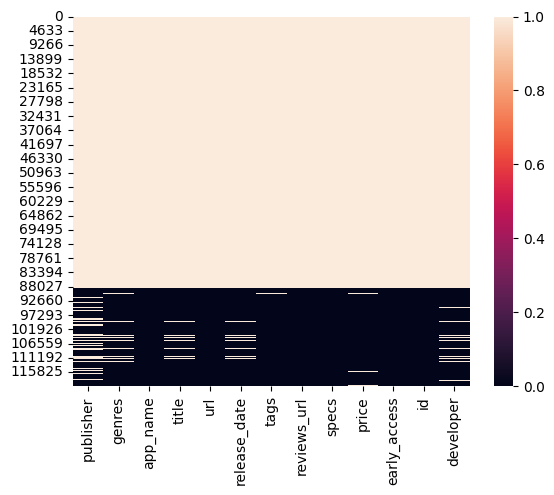

In [101]:
sns.heatmap(df_steam_games_procesado.isnull())
plt.show()

Observamos que hay una gran cantidad de valores faltantes. Por ende, al finalizar realizaremos un df.dropna() para eliminar los registros con valores faltantes

Echamos un vistazo a los datos de las columnas

In [102]:
df_steam_games_procesado.dropna().head(7)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd
88317,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,http://store.steampowered.com/app/774277/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774277/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",18.99,False,774277,Poppermost Productions
88318,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774278/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",29.99,False,774278,Poppermost Productions


Observamos un comportamiento particular entre algunas columnas y los revisamos mas a fondo

In [103]:
df_steam_games_procesado[["publisher", "developer", "app_name", "title", "genres", "tags"]].dropna().head(7)

,publisher,developer,app_name,title,genres,tags
88310,Kotoshiro,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]"
88311,"Making Fun, Inc.",Secret Level SRL,Ironbound,Ironbound,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game..."
88312,Poolians.com,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind..."
88313,彼岸领域,彼岸领域,弹炸人2222,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]"
88315,Trickjump Games Ltd,Trickjump Games Ltd,Battle Royale Trainer,Battle Royale Trainer,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ..."
88317,Poppermost Productions,Poppermost Productions,SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]"
88318,Poppermost Productions,Poppermost Productions,SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]"


Vemos que, como habíamos intuido, los valores entre estos pares de columnas se ven muy similares, y por ende, redundantes entre si. Realizamos un análisis un poco más a fondo para decidir el paso a seguir

In [104]:
df_steam_games_procesado[["publisher", "developer", "app_name", "title", "genres", "tags"]].describe()

,publisher,developer,app_name,title,genres,tags
count,24083,28836,32133,30085,28852,31972
unique,8239,10992,32094,30054,883,15395
top,Ubisoft,Ubisoft - San Francisco,Soundtrack,Soundtrack,[Action],"[Casual, Simulation]"
freq,385,1259,3,3,1880,1292


Hemos realizado un .describe() a las columnas y observamos lo siguiente:
- **"publisher"-"developer"**: La columna "publisher" tiene 24083 datos no-nulos y 8239 valores únicos. Por otro lado, la columna "developer" contiene 28836 valores no-nulos y 10992 valores únicos. Asi, vemos que la columna "developer" tiene 4753 valores no-nulos y 2753 valores únicos más que la columna "publisher". Por ende, optamos por eliminar la columna "publisher" del DataFrame.

- **"app_name"-"title"**: La columna "app_name" tiene 32133 datos no-nulos y 32094 valores únicos. Por otro lado, la columna "title" contiene 30085 valores no-nulos y 30054 valores únicos. Asi, vemos que la columna "app_name" tiene 2048 valores no-nulos y 2040 valores únicos más que la columna "title". Por ende, optamos por eliminar la columna "title" del DataFrame.

- **"genres"-"tags"**: A primera vista vemos que la columna "genres" tiene 28852 valores no-nulos y 883 valores únicos. Por otro lado, la columna "tags" contiene 31972 datos no-nulos y 15395 valores únicos. Así, la columna "tags" parece una mejor candidata para permanecer en el DataFrame. Sin embargo, estas columnas tienen datos anidados. Por ende, debemos desanidarlos para sacar conclusiones más acertadas.

In [105]:
print(df_steam_games_procesado["genres"].explode().describe())
print("-----")
print(df_steam_games_procesado["tags"].explode().describe())

count     71554
unique       22
top       Indie
freq      15858
Name: genres, dtype: object
-----
count     169229
unique       339
top        Indie
freq       17620
Name: tags, dtype: object


Al desanidar las columnas vemos el potencial que tiene el método .explode() para reunir información más exacta. La columna "tags" claramente aporta más información para el análisis. Entocnes, optamos por eliminar la columna "genres"

Antes de continuar a eliminar las columnas realizaremos un precedimiento sobre la columna "release_date" para obtener el año a partir de esta, ya que este será necesario para la elaboración del endpoint de la API

In [106]:
# Especificamos el formato en el cual queremos la fecha
formato = "%Y-%m-%d"
# Definimos la función para transformar las fechas a un mismo formato
def unificarFechas(fecha_sin_formatear):
    try:
        return parse(fecha_sin_formatear).strftime(formato)
    except:
        return None
# Aplicamos unificarFechas a la columna "release_date"
df_steam_games_procesado["release_date"] = df_steam_games_procesado["release_date"].apply(unificarFechas)

# Definimos la función para obtener el año a partir de la fecha usando slicing
def toYear(fecha):
    try:
        return int(fecha[:4])
    except:
        return None
# Aplicamos .toYear() a la columna "release_date"
df_steam_games_procesado["release_date"] = df_steam_games_procesado["release_date"].apply(toYear)

Ahora, vamos a realizar un procedimiento para facilitar la comprensión de los datos a simpre vista

In [107]:
# Eliminamos las columnas que son redundantes o no aportan información para los endpoint de la API
df_steam_games_procesado.drop(columns = ["publisher", "genres", "title", "url", "reviews_url", "specs", "early_access"], inplace = True)
# Elimianmos los valores nulos
df_steam_games_procesado.dropna(inplace = True)
# Renombramos y reordenamos las columnas
df_steam_games_procesado.rename(columns = {
    "id": "id_app",
    "release_date": "release_year",
    "tags": "genres"
}, inplace = True)
new_order = ["id_app", "app_name", "developer", "release_year", "price", "genres"]
df_steam_games_procesado = df_steam_games_procesado[new_order]
df_steam_games_procesado.head(7)

,id_app,app_name,developer,release_year,price,genres
88310,761140,Lost Summoner Kitty,Kotoshiro,2018.0,4.99,"[Strategy, Action, Indie, Casual, Simulation]"
88311,643980,Ironbound,Secret Level SRL,2018.0,Free To Play,"[Free to Play, Strategy, Indie, RPG, Card Game..."
88312,670290,Real Pool 3D - Poolians,Poolians.com,2017.0,Free to Play,"[Free to Play, Simulation, Sports, Casual, Ind..."
88313,767400,弹炸人2222,彼岸领域,2017.0,0.99,"[Action, Adventure, Casual]"
88315,772540,Battle Royale Trainer,Trickjump Games Ltd,2018.0,3.99,"[Action, Adventure, Simulation, FPS, Shooter, ..."
88316,774276,SNOW - All Access Basic Pass,Poppermost Productions,2018.0,9.99,"[Free to Play, Indie, Simulation, Sports]"
88317,774277,SNOW - All Access Pro Pass,Poppermost Productions,2018.0,18.99,"[Free to Play, Indie, Simulation, Sports]"


Nos interesa desanidar los datos de la columna "genres" y preparar un posible modelo de ML. Por ende, optamos por realizar un procedimiento tipo .get_dummies() sobre esta columna

In [108]:
# Desanidamos los géneros presentes en la columna "genres"
df_steam_games_procesado = df_steam_games_procesado.explode("genres")
# Convertimos las variables catégoricas de la columna "genres" a variables dummies
df_steam_games_procesado = pd.get_dummies(df_steam_games_procesado, prefix = "genre", prefix_sep = "_", columns = ["genres"], dtype = int)
# Debido a que hicimos crecer considerablemente el tamaño del DataFrame, agrupamos los datos por cada juego sumando las variables que convertimos a dummies
df_steam_games_procesado = df_steam_games_procesado.groupby(df_steam_games_procesado.columns.to_list()[:5])[df_steam_games_procesado.columns.to_list()[5:]].sum().reset_index()
df_steam_games_procesado.head(7)

,id_app,app_name,developer,release_year,price,genre_1980s,genre_1990's,genre_2.5D,genre_2D,genre_2D Fighter,...,genre_Warhammer 40K,genre_Web Publishing,genre_Werewolves,genre_Western,genre_Word Game,genre_World War I,genre_World War II,genre_Wrestling,genre_Zombies,genre_e-sports
0,10,Counter-Strike,Valve,2000.0,9.99,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1002,Rag Doll Kung Fu,Mark Healey,2005.0,9.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100400,Silo 2,Nevercenter Ltd. Co.,2012.0,99.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10090,Call of Duty: World at War,Treyarch,2008.0,19.99,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,100980,3D-Coat V4.8,Pilgway,2012.0,99.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10100,King's Quest™ Collection,Sierra,2006.0,19.99,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10110,Space Quest™ Collection,Sierra,2006.0,19.99,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Para finalizar, los datos de la columna "price" están en tipo string pero representan valores numéricos. Realizaremos un procedimiento sobre esta columna para transformarlos

In [109]:
# Creamos la función que transforma datos de tipo string a decimal en caso de ser posible
def convertirADecimal(dato):
    try:
        return float(dato)
    except:
        return 0
# Aplicamos la anterior función a la columna "price"
df_steam_games_procesado["price"] = df_steam_games_procesado["price"].apply(convertirADecimal)
df_steam_games_procesado.head(7)

,id_app,app_name,developer,release_year,price,genre_1980s,genre_1990's,genre_2.5D,genre_2D,genre_2D Fighter,...,genre_Warhammer 40K,genre_Web Publishing,genre_Werewolves,genre_Western,genre_Word Game,genre_World War I,genre_World War II,genre_Wrestling,genre_Zombies,genre_e-sports
0,10,Counter-Strike,Valve,2000.0,9.99,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1002,Rag Doll Kung Fu,Mark Healey,2005.0,9.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100400,Silo 2,Nevercenter Ltd. Co.,2012.0,99.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10090,Call of Duty: World at War,Treyarch,2008.0,19.99,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,100980,3D-Coat V4.8,Pilgway,2012.0,99.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10100,King's Quest™ Collection,Sierra,2006.0,19.99,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10110,Space Quest™ Collection,Sierra,2006.0,19.99,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Load**

Finalmente, cargamos los datos en un archivo .parquet para reducir lo máximo posible el tamaño del Dataset usando pyarrow

In [110]:
df_steam_games_procesado.to_parquet("Datasets/steam_games.parquet", engine = "pyarrow")